In [11]:
import sys
sys.path.append("..")
import numerus.learning as learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
geodata = pd.read_csv("../tests/data/UScounties.csv")
votedata = pd.read_csv("../tests/data/USvote.csv")
merged = geodata.join(votedata)
trimmed = merged.loc[:,["Longitude", "Latitude", "gop_2016", "dem_2016"]]
data = [{
 "input": np.array([row["Longitude"], row["Latitude"]]),
 "output": "GOP" if row["dem_2016"] < row["gop_2016"] else "DEM"
} for i, row in merged.iterrows()]

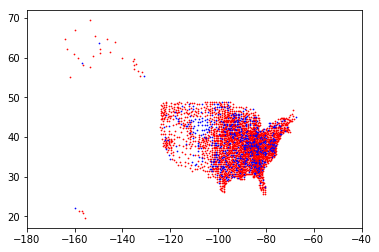

In [16]:
for label in ["GOP", "DEM"]:
    x = [county["input"][0] for county in data if county["output"] == label]
    y = [county["input"][1] for county in data if county["output"] == label]
    plt.scatter(x, y, c={"GOP": "red", "DEM": "blue"}[label], s=0.5)
plt.xlim(-180, -40)
plt.show()

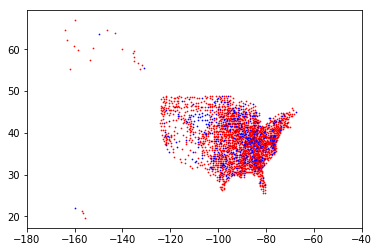

In [17]:
np.random
training_data, test_data = learning.divide_data(data)
for label in ["GOP", "DEM"]:
    x = [county["input"][0] for county in training_data if county["output"] == label]
    y = [county["input"][1] for county in training_data if county["output"] == label]
    plt.scatter(x, y, c={"GOP": "red", "DEM": "blue"}[label], s=0.5)
plt.xlim(-180, -40)
plt.show()

In [18]:
model = learning.KNearestNeighbour(k=1)
model.train(training_data)